In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\mission_launches.csv")

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df.drop("Unnamed: 0.1", axis=1, inplace=True)

In [7]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [9]:
df.describe().transpose()

,count,unique,top,freq
Organisation,4324,56,RVSN USSR,1777
Location,4324,137,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",235
Date,4324,4319,"Wed Nov 05, 2008 00:15 UTC",2
Detail,4324,4278,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,6
Rocket_Status,4324,2,StatusRetired,3534
Price,964,56,450.0,136
Mission_Status,4324,4,Success,3879


In [10]:
df.isna().value_counts()

Organisation  Location  Date   Detail  Rocket_Status  Price  Mission_Status
False         False     False  False   False          True   False             3360
                                                      False  False              964
dtype: int64

In [11]:
df.isna()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4319,False,False,False,False,False,True,False
4320,False,False,False,False,False,True,False
4321,False,False,False,False,False,True,False
4322,False,False,False,False,False,True,False


In [12]:
# which org launched most missions and the mission details
missions_count_df = pd.DataFrame(df.groupby("Organisation").value_counts())
missions_count_df.head(50)

0
Organisation Location                                          Date                       Detail                                             Rocket_Status Price Mission_Status    
Arianespace  ELA-3, Guiana Space Centre, French Guiana, France Fri Apr 18, 2008 22:17 UTC Ariane 5 ECA | Star One C2 & Vinasat-1             StatusActive  200.0 Success          1
                                                               Fri Apr 22, 2011 21:37 UTC Ariane 5 ECA | Yahsat 1A, Intelsat 28 (New Dawn)   StatusActive  200.0 Success          1
                                                               Thu May 14, 2009 13:12 UTC Ariane 5 ECA | Herschel Space Observatory & Planck StatusActive  200.0 Success          1
                                                               Thu Aug 29, 2013 20:30 UTC Ariane 5 ECA | Eutelsat 25B/Es'hail 1, GSAT-7      StatusActive  200.0 Success          1
                                                               Thu Feb 06, 2014 21:30 UTC Ariane 5 ECA | ABS-2, Athena-Fidus                 StatusActive  200.0 Success          1
                                                               Thu Feb 07, 2013 21:36 UTC Ariane 5 ECA | Amazonas-3, Azerspace-1 (Africas... StatusActive  200.0 Success          1
                                                               Thu Feb 12, 2009 22:09 UTC Ariane 5 ECA | Hot Bird 10, NSS-9, Spirale-A & B   StatusActive  200.0 Success          1
                                                               Thu Jan 16, 2020 21:05 UTC Ariane 5 ECA | Eutelsat Konnect BB4A & GSAT-30     StatusActive  200.0 Success          1
                                                               Thu Jan 25, 2018 22:20 UTC Ariane 5 ECA | SES-14/GOLD & Al Yah-3              StatusActive  200.0 Partial Failure  1
                                                               Thu Jul 05, 2012 21:36 UTC Ariane 5 ECA | EchoStar XVII, MSG-3                StatusActive  200.0 Success          1
                                                               Thu Jul 25, 2013 19:54 UTC Ariane 5 ECA | Alphasat I-XL, INSAT-3D             StatusActive  200.0 Success          1
                                                               Thu Jun 01, 2017 23:45 UTC Ariane 5 ECA | ViaSat 2, Eutelsat 172B             StatusActive  200.0 Success          1
                                                               Thu Jun 12, 2008 22:05 UTC Ariane 5 ECA | Skynet 5C & Turksat 3A              StatusActive  200.0 Success          1
                                                               Thu Jun 20, 2019 21:43 UTC Ariane 5 ECA | Eutelsat 7C &  AT&T T-16            StatusActive  200.0 Success          1
                                                               Thu May 04, 2017 21:50 UTC Ariane 5 ECA | Koreasat 7, SGDC-1                  StatusActive  200.0 Success          1
                                                               Thu Oct 01, 2009 21:59 UTC Ariane 5 ECA | Amazonas 2 & COMSATBw-1             StatusActive  200.0 Success          1
                                                               Thu Aug 14, 2008 20:44 UTC Ariane 5 ECA | Superbird-7 & AMC-21                StatusActive  200.0 Success          1
                                                               Thu Oct 16, 2014 21:43 UTC Ariane 5 ECA | Intelsat 30, ARSAT-1                StatusActive  200.0 Success          1
                                                               Thu Oct 28, 2010 23:51 UTC Ariane 5 ECA | Eutelsat W3B, BSAT-3B               StatusActive  200.0 Success          1
                                                               Thu Oct 29, 2009 20:00 UTC Ariane 5 ECA | NSS-12 & Thor-6                     StatusActive  200.0 Success          1
                                                               Thu Sep 11, 2014 22:05 UTC Ariane 5 ECA | MEASAT 3b, Optus 10                 StatusActive  200.0 Success          1
                                      

In [13]:
df["Price"] = pd.to_numeric(df["Price"], errors="coerce", downcast="integer")

In [14]:
# Calculate the average cost for each organization
avrg_cost = df.groupby('Organisation')['Price'].transform('mean')

# Fill missing prices with the average price of that organisation's missions
df['Price'].fillna(avrg_cost, inplace=True)

In [15]:
# which org launched most missions and the mission details
missions_count_df = pd.DataFrame(df.groupby("Organisation").value_counts())
missions_count_df.head(50)

0
Organisation Location                                           Date                       Detail                                  Rocket_Status Price      Mission_Status   
Arianespace  ELA-1, Guiana Space Centre, French Guiana, France  Fri Feb 08, 1985 23:22 UTC Ariane 3 | Arabsat-1A, Brasilsat-A1     StatusRetired 170.260417 Success         1
                                                                Fri Jan 27, 1989 01:21 UTC Ariane 2 | Intelsat-5A 15               StatusRetired 170.260417 Success         1
             ELV-1 (SLV), Guiana Space Centre, French Guiana... Fri Sep 16, 2016 01:43 UTC Vega | PeruSat-1 and SkySats 4-7        StatusActive  37.000000  Success         1
             Site 31/6, Baikonur Cosmodrome, Kazakhstan         Thu Feb 06, 2020 21:42 UTC Soyuz 2.1b/Fregat | OneWeb #2           StatusActive  48.500000  Success         1
                                                                Sat Mar 21, 2020 17:06 UTC Soyuz 2.1b/Fregat | OneWeb #3           StatusActive  48.500000  Success         1
             ELV-1 (SLV), Guiana Space Centre, French Guiana... Wed Nov 21, 2018 01:42 UTC Vega | Mohammed VI-B                    StatusActive  37.000000  Success         1
                                                                Wed Nov 08, 2017 01:42 UTC Vega | Mohammed VI-A                    StatusActive  37.000000  Success         1
                                                                Wed May 23, 1984 01:33 UTC Ariane 1 | Spacenet F1                  StatusRetired 170.260417 Success         1
                                                                Wed Feb 11, 2015 13:40 UTC Vega | IXV                              StatusActive  37.000000  Success         1
                                                                Wed Aug 22, 2018 21:20 UTC Vega | ADM-Aeolus                       StatusActive  37.000000  Success         1
                                                                Wed Aug 02, 2017 01:58 UTC Vega | OPSAT 3000 & VEN†æS              StatusActive  37.000000  Success         1
                                                                Wed Apr 30, 2014 01:35 UTC Vega | KazEOSat-1                       StatusActive  37.000000  Success         1
                                                                Tue May 07, 2013 02:06 UTC Vega | Proba-V, VNREDSat-1A & ESTCube-1 StatusActive  37.000000  Success         1
                                                                Tue Mar 07, 2017 01:49 UTC Vega | Sentinel 2B                      StatusActive  37.000000  Success         1
                                                                Tue Jun 23, 2015 01:51 UTC Vega | Sentinel-2A                      StatusActive  37.000000  Success         1
                                                                Tue Jul 02, 1985 11:23 UTC Ariane 1 | Giotto                       StatusRetired 170.260417 Success         1
                                                                Thu Jul 11, 2019 01:53 UTC Vega | Falcon Eye 1                     StatusActive  37.000000  Failure         1
                                                                Thu Dec 03, 2015 04:04 UTC Vega | LISA Pathfinder                  StatusActive  37.000000  Success         1
                                                                Sat Feb 22, 1986 01:44 UTC Ariane 1 | SPOT-1 & Viking              StatusRetired 170.260417 Success         1
                                                                Mon Dec 05, 2016 13:51 UTC Vega | G??kt??rk-1A                     StatusActive  37.000000  Success         1
                                                                Fri Mar 22, 2019 01:50 UTC Vega | PRISMA                           StatusActive  37.000000  Success         1
             ELA-2, Guiana Space Centre, French Guiana, France  Tue Jun 03, 1997 23:20 UTC Ariane 44L | Inmarsat 3 F4, Insat 2D    StatusRetired 170.260417 Success       

In [26]:
null_price_rows = df[df['Price'].isna()]
null_price_rows

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
35,IRGC,"Launch Plateform, Shahrud Missile Test Site","Wed Apr 22, 2020 03:59 UTC",Qased | Noor 1,StatusActive,NaN,Success
52,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Sun Feb 09, 2020 15:48 UTC",Simorgh | Zafar 1,StatusActive,NaN,Failure
71,Blue Origin,"Blue Origin Launch Site, West Texas, Texas, USA","Wed Dec 11, 2019 17:55 UTC",New Shepard | NS-12,StatusActive,NaN,Success
91,Exos,"Vertical Launch Area, Spaceport America, New M...","Sat Oct 26, 2019 17:40 UTC",SARGE | Launch 4,StatusActive,NaN,Failure
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [29]:
# Fill missing prices with the average price of that organisation's missions
df['Price'].fillna(0, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           4324 non-null   float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [31]:
null_price_rows = df[df['Price'].isna()]
null_price_rows

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status


In [32]:
#total missions each org has launched
total_mission_counts= df["Organisation"].value_counts()

mx_mission_org = total_mission_counts.idxmax()
print(total_mission_counts)
print(f"max missions are lauched by: {mx_mission_org}")

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [33]:
mission_cost_per_org = df.groupby("Organisation")["Price"].sum()
total_price_df = pd.DataFrame(mission_cost_per_org)


print(f"Maximum total cost of a mission : {total_price_df.max()}\n")
print(f"Org with max total cost : {total_price_df.idxmax()}")

Maximum total cost of a mission : Price    91350.0
dtype: float64

Org with max total cost : Price    NASA
dtype: object


In [34]:
success_fail_count = df.groupby("Organisation")["Mission_Status"].value_counts()
mission_stat = pd.DataFrame(success_fail_count)

mission_stat

Mission_Status
Organisation Mission_Status                   
AEB          Failure                         2
             Prelaunch Failure               1
AMBA         Success                         4
             Failure                         3
             Partial Failure                 1
...                                        ...
VKS RF       Failure                         7
             Partial Failure                 6
Virgin Orbit Failure                         1
Yuzhmash     Success                         2
i-Space      Success                         1

[119 rows x 1 columns]

In [35]:
success_count = df[df['Mission_Status'] == 'Success'].groupby("Organisation")["Mission_Status"].count()
mx_success = success_count.idxmax()

print(f"Org with max successful missions: {mx_success}")

Org with max successful missions: RVSN USSR


In [38]:
org_name = input("Enter an org name here: ")

org_data = df[df["Organisation"] == org_name]
org_data

Enter an org name here: SpaceX


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,54.989899,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.000000,Success
17,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Tue Jun 30, 2020 20:10 UTC",Falcon 9 Block 5 | GPS III SV03,StatusActive,50.000000,Success
20,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Sat Jun 13, 2020 09:21 UTC",Falcon 9 Block 5 | Starlink V1 L8 & SkySat 16 ...,StatusActive,50.000000,Success
...,...,...,...,...,...,...,...
763,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Tue Jul 14, 2009 03:35 UTC",Falcon 1 | RazakSat,StatusRetired,7.000000,Success
800,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Sun Sep 28, 2008 23:15 UTC",Falcon 1 | RatSat,StatusRetired,7.000000,Success
808,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Sun Aug 03, 2008 03:34 UTC",Falcon 1 | Flight 3,StatusRetired,7.000000,Failure
879,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Wed Mar 21, 2007 01:10 UTC",Falcon 1 | DemoSat,StatusRetired,7.000000,Failure


In [39]:
fig = px.line(org_data, x="Date", y="Price",title=f'Price Changes for {org_name} Missions')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')
fig.show()

In [41]:
rocket_status = df.groupby("Organisation")["Rocket_Status"].value_counts()
rocket_status_df = pd.DataFrame(rocket_status)

rocket_status_df

Rocket_Status
Organisation Rocket_Status               
AEB          StatusActive               3
AMBA         StatusRetired              8
ASI          StatusRetired              9
Arianespace  StatusRetired            165
             StatusActive             114
...                                   ...
VKS RF       StatusRetired            174
             StatusActive              27
Virgin Orbit StatusActive               1
Yuzhmash     StatusRetired              2
i-Space      StatusActive               1

[74 rows x 1 columns]

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Price', ylabel='Density'>

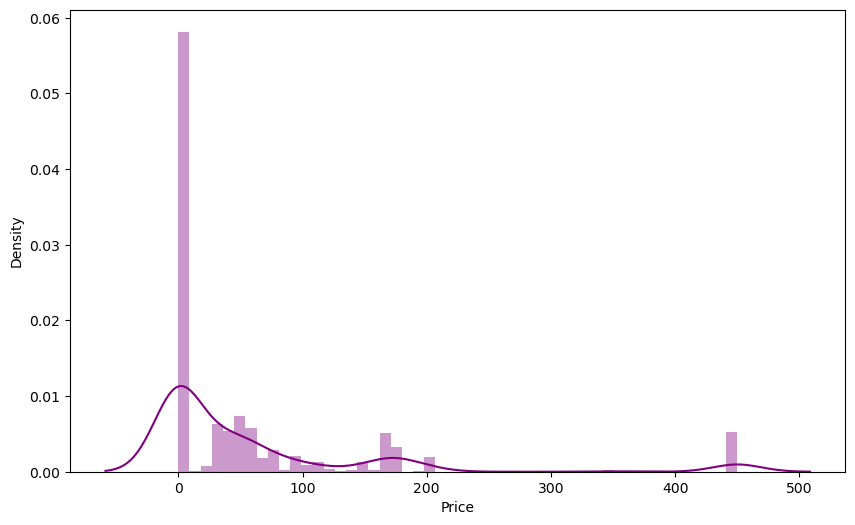

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(df["Price"], color="purple")

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Mission_Status', ylabel='count'>

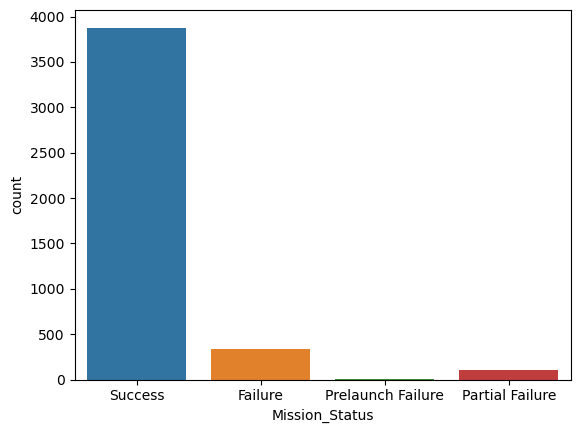

In [43]:
sns.countplot(df["Mission_Status"])

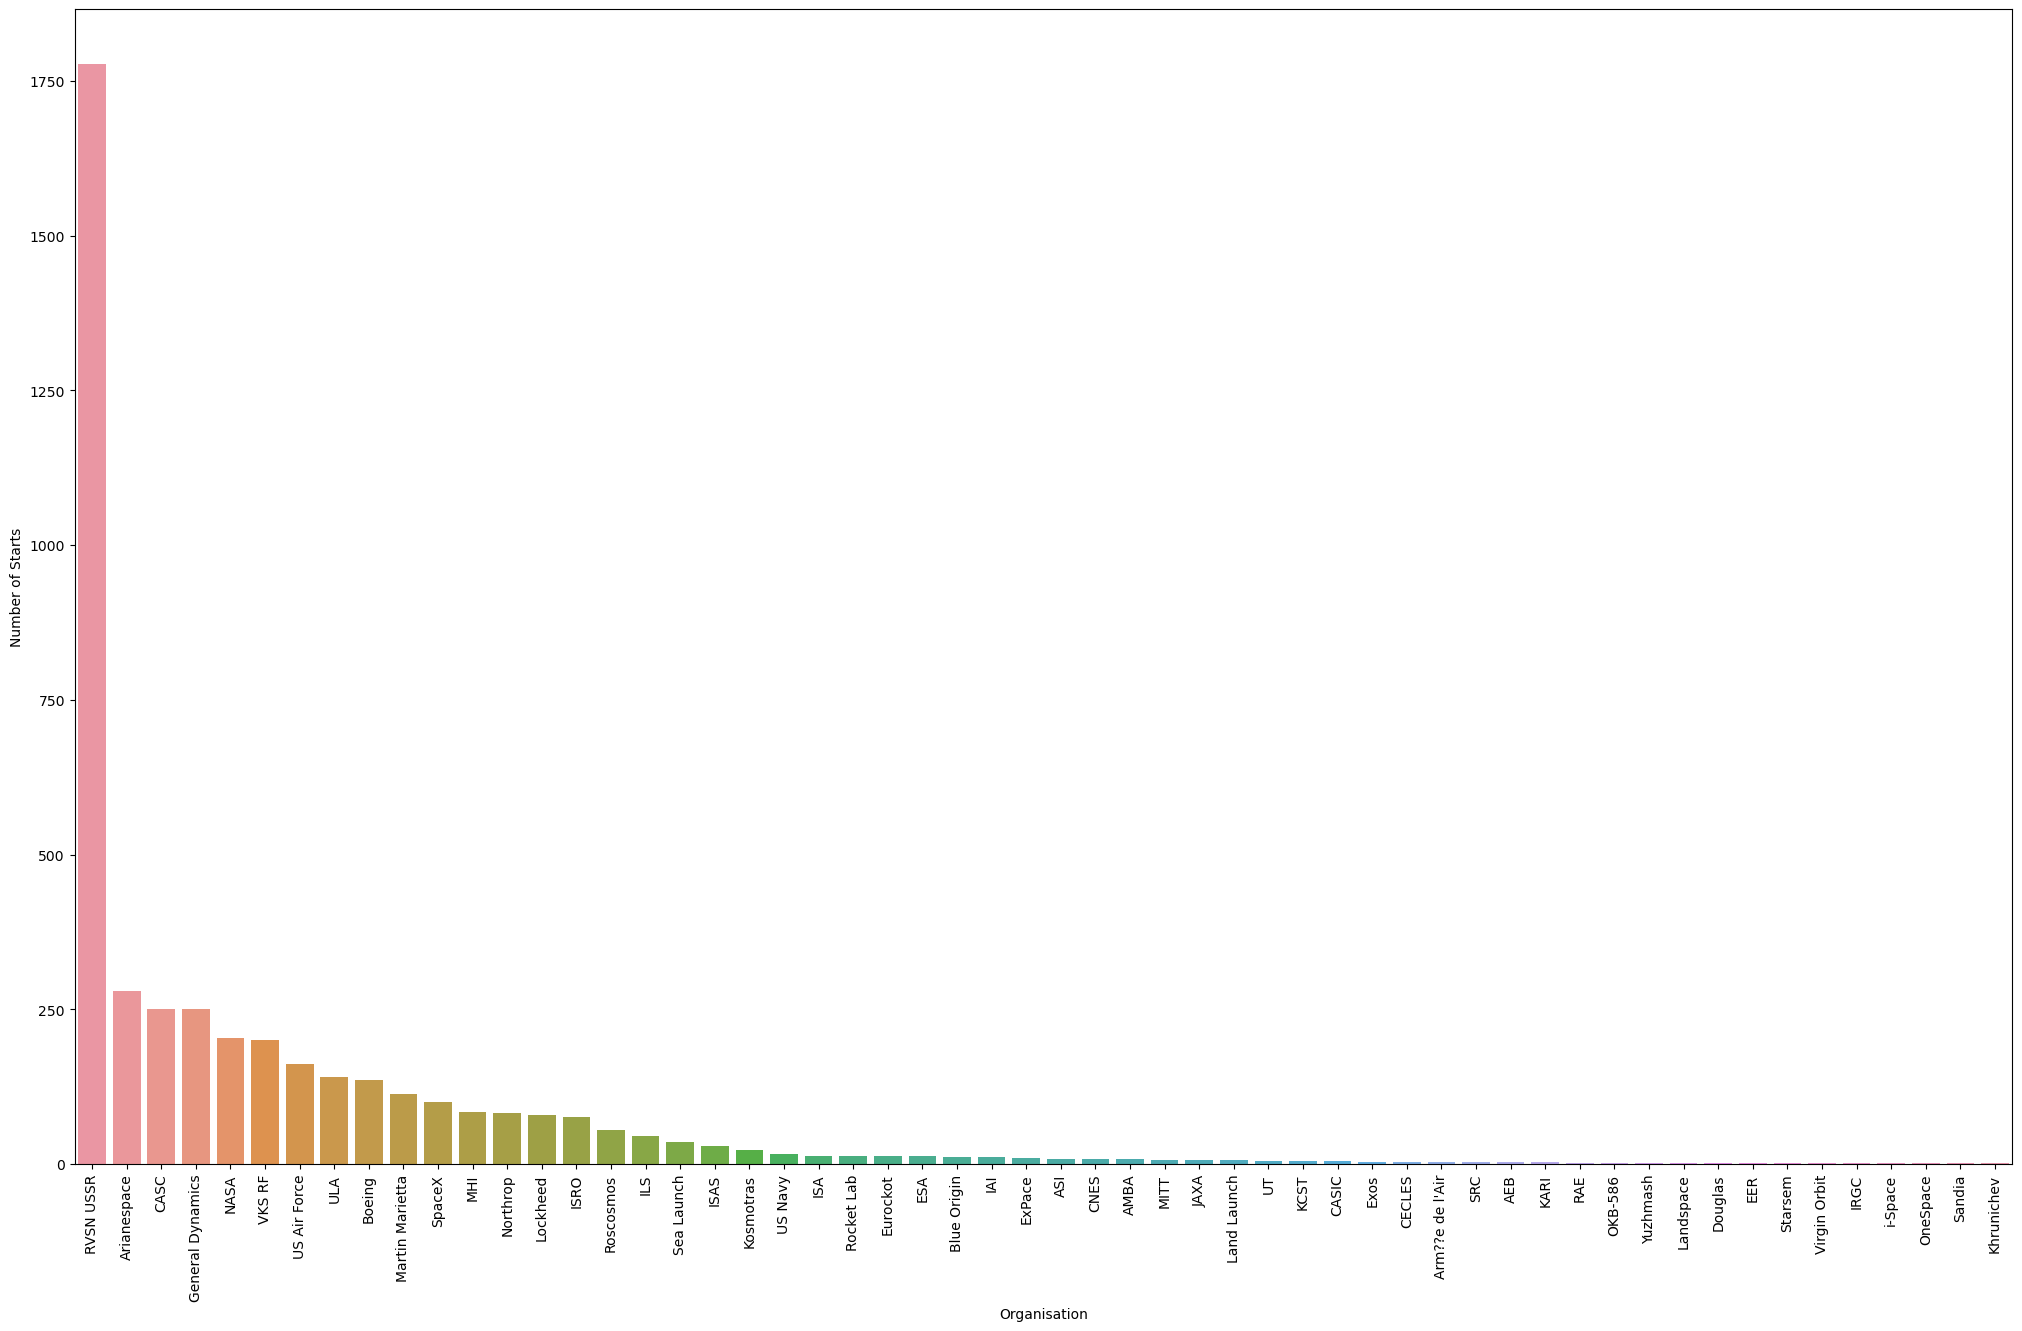

In [44]:
missions_by_org = df["Organisation"].value_counts().reset_index()
missions_by_org.columns = ["Organisation", "Number of Starts"]


missions_by_org = missions_by_org.sort_values("Number of Starts", ascending=False)

plt.figure(figsize=(25,15))
p = sns.barplot(x=missions_by_org["Organisation"], y=missions_by_org["Number of Starts"])
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.show()

In [45]:
ds = df["Mission_Status"].value_counts().reset_index()
ds.columns = ['Mission_status', 'count']


fig = px.pie(
    ds, 
    values='count', 
    names="Mission_status", 
    title='Success and Failure of the Rocket Missions', 
    width=500, 
    height=500,
    hole = 0.4
)

fig.update_layout( title_x = 0.5)
fig.show()

In [46]:
df.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [47]:
df["Mission_Status"] = df["Mission_Status"].apply(lambda x: 1 if x == "Success" else 0)

In [48]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000,1
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,54.989899,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000,1
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.000000,1


In [52]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
le = LabelEncoder()

# Label encode categorical columns
df['Organisation'] = le.fit_transform(df['Organisation'])
df['Location'] = le.fit_transform(df['Location'])
df['Detail'] = le.fit_transform(df['Detail'])
df['Rocket_Status'] = le.fit_transform(df['Rocket_Status'])



# Define the features (X) and target (y)
X = df.drop(columns=['Mission_Status', 'Date'])  # Dropping 'Date' as well since it's not useful directly
y = df['Mission_Status']

In [54]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}


model_accuracies = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    
    # Print accuracy
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    
    # Print classification report
    print(f'{model_name} Classification Report:')
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Display the accuracy of each model
print("\nModel Comparison:")
for model_name, accuracy in model_accuracies.items():
    print(f'{model_name}: {accuracy:.2f}')

Logistic Regression Accuracy: 0.90
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.90      1.00      0.95       778

    accuracy                           0.90       865
   macro avg       0.45      0.50      0.47       865
weighted avg       0.81      0.90      0.85       865

------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Random Forest Accuracy: 0.87
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.40      0.39        87
           1       0.93      0.92      0.93       778

    accuracy                           0.87       865
   macro avg       0.65      0.66      0.66       865
weighted avg       0.88      0.87      0.87       865

------------------------------------------------------------
Gradient Boosting Accuracy: 0.90
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.13      0.21        87
           1       0.91      0.99      0.95       778

    accuracy                           0.90       865
   macro avg       0.76      0.56      0.58       865
weighted avg       0.88      0.90      0.87       865

------------------------------------------------------------
Support Vector Machine Accuracy: 0.90
Support Vector Machine Classification Report:


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

